<a href="https://colab.research.google.com/github/rmonterof/Scikit-learn/blob/main/Coste_seguro_veh%C3%ADculo_algoritmos_y_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¡Claro! El cálculo del coste de un seguro de vehículo es un proceso complejo que utiliza varios algoritmos y se basa en múltiples métricas para evaluar el riesgo.

🔢 Algoritmos ComunesLas aseguradoras utilizan modelos estadísticos y de Machine Learning para predecir la probabilidad de que un asegurado presente un siniestro y el coste medio de ese siniestro.

Modelos de Regresión (Generalmente Regresión Lineal Generalizada - GLM): 📈Son el método tradicional. Las GLM se utilizan para relacionar la probabilidad de siniestro (frecuencia) y el coste medio del siniestro (severidad) con las distintas variables de riesgo (las métricas).El coste total (prima pura) se obtiene como Prima Pura = Frecuencia $\times$ Severidad. A esto se le añaden recargos y gastos de gestión.

Modelos de Aprendizaje Automático (Machine Learning): 🧠Algoritmos más avanzados como los Árboles de Decisión, Bosques Aleatorios (Random Forests), y el Boosting (por ejemplo, Gradient Boosting Machines o GBM) se usan cada vez más para identificar patrones de riesgo más complejos y hacer predicciones más precisas.También se pueden usar Redes Neuronales para modelos de riesgo muy sofisticados.

Modelos de Clustering: 📊Se utilizan para agrupar clientes con perfiles de riesgo similares (segmentación) y aplicar tarifas específicas a cada grupo.

📊 Métricas Clave para el Cálculo Las métricas se dividen en tres grandes categorías que el algoritmo introduce en el cálculo para determinar el nivel de riesgo y, por lo tanto, el precio.

1.Métricas del Conductor y TomadorEstas variables evalúan el riesgo asociado a la persona que conduce y asegura el vehículo.

Historial de Siniestros y Bonus-Malus: El factor más determinante.Frecuencia de Siniestros Anteriores: ¿Cuántos partes ha dado el conductor en años anteriores?Gravedad de Siniestros Anteriores: ¿Han sido siniestros de alto coste o solo leves?

Edad y Sexo: 🧑‍🦳👩Estadísticamente, conductores jóvenes o con poca experiencia suelen tener primas más altas.

Antigüedad del Carné de Conducir: Mayor experiencia implica menor riesgo.

Residencia Habitual: 📍El código postal influye mucho. Vivir en zonas urbanas densas o con alta tasa de robos o vandalismo aumenta el coste.

Estado Civil y Profesión: Algunas profesiones o situaciones personales pueden estar correlacionadas con un uso del vehículo de mayor o menor riesgo.

2. Métricas del VehículoSe refieren a las características intrínsecas del coche que afectan al riesgo de siniestro y al coste de reparación.

Marca, Modelo y Versión: 🚗

Potencia (CV o Potencia Fiscal): Los vehículos más potentes suelen tener una prima más alta por la correlación con la conducción deportiva y el riesgo de accidente.

Antigüedad del Vehículo: Los coches nuevos pueden ser más caros de reparar, mientras que los muy antiguos pueden ser más propensos a fallos.

Valor del Vehículo (Valor de Mercado o Valor a Nuevo): Determina el coste máximo de indemnización en caso de pérdida total.

Sistemas de Seguridad: Contar con alarmas, inmovilizadores o sistemas de asistencia a la conducción (ADAS) puede reducir la prima.

Tipo de Combustible: Puede influir en la frecuencia de incendio o el coste de las piezas.

3. Métricas del Uso y CoberturasEstas variables definen cómo y para qué se usa el vehículo y qué tipo de protección se contrata.

Tipo de Cobertura Contratada: La diferencia entre un seguro a terceros (básico) y un todo riesgo (con o sin franquicia) es fundamental.

Kilometraje Anual Estimado: Un uso más intensivo aumenta la exposición al riesgo.

Uso del Vehículo: ¿Particular, profesional, o ambos?

Lugar de Estacionamiento Habitual: 🅿️ Guardar el coche en un garaje privado vs. en la calle reduce significativamente la prima.

Franquicia: El importe que asume el asegurado en caso de siniestro. A mayor franquicia, menor es el coste de la prima.

---



Excelente idea! Un ejemplo práctico con código Python nos ayudará a entender cómo funcionan los Modelos de Regresión Lineal Generalizada (GLM), que son la base de la tarificación de seguros.

Usaremos datos simulados para mostrar cómo se relacionan algunas métricas (como la edad del conductor y la potencia del coche) con la Frecuencia de Siniestros (el número de siniestros por año).

💻 Ejemplo Práctico en Python: Modelo de Frecuencia
Para este ejemplo, usaremos las librerías pandas para la gestión de datos, numpy para operaciones numéricas y statsmodels para el modelo GLM. El modelo de frecuencia de siniestros típicamente utiliza una distribución Poisson o Binomial Negativa debido a que la variable de respuesta (número de siniestros) es un conteo.

1. Código Python

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Generación de Datos Simulados ---
# Simulación de 1000 pólizas
np.random.seed(42)
n_polizas = 1000

data = {
    # Edad del conductor (simulada)
    'Edad_Conductor': np.random.normal(loc=40, scale=10, size=n_polizas).clip(18, 70).astype(int),
    # Potencia del Coche (en CV, simulada)
    'Potencia_CV': np.random.normal(loc=120, scale=30, size=n_polizas).clip(50, 250).astype(int),
    # ¿Estaciona en garaje? (Variable binaria)
    'Garaje_Privado': np.random.choice([0, 1], size=n_polizas, p=[0.4, 0.6]),
}

df = pd.DataFrame(data)

# Creación de la variable "target": Frecuencia de Siniestros (usando distribución Poisson)
# La Frecuencia está influenciada por las variables (las métricas)
# Asumimos que: Menor edad -> Mayor riesgo; Mayor potencia -> Mayor riesgo; Garaje privado -> Menor riesgo
lambda_base = 0.15 # Frecuencia promedio base
df['log_lambda'] = (
    np.log(lambda_base)
    - 0.01 * (df['Edad_Conductor'] - 40) # A menor edad, mayor frecuencia
    + 0.005 * (df['Potencia_CV'] - 120)  # A mayor potencia, mayor frecuencia
    - 0.5 * df['Garaje_Privado']        # El garaje reduce significativamente la frecuencia
)

df['Frecuencia_Siniestros'] = np.random.poisson(np.exp(df['log_lambda']))
df.drop(columns=['log_lambda'], inplace=True) # Eliminamos la variable intermedia

# --- 2. Preparación para el GLM ---
# Variables predictoras (X)
X = df[['Edad_Conductor', 'Potencia_CV', 'Garaje_Privado']]
X = sm.add_constant(X, prepend=False) # Añadir la constante (intercepto)
# Variable objetivo (y)
y = df['Frecuencia_Siniestros']

# --- 3. Aplicación del Algoritmo GLM (Regresión de Poisson) ---
# Usamos el modelo GLM con la distribución de la familia Poisson y función de enlace Logarítmica
poisson_model = GLM(y, X, family=families.Poisson(link=families.links.log()))
poisson_results = poisson_model.fit()

# Resultados del modelo
print("### Resultados del Modelo GLM (Poisson) ###")
print(poisson_results.summary())

# Predicción de la Frecuencia (Lambda)
df['Frecuencia_Predicha'] = poisson_results.predict(X)

### Resultados del Modelo GLM (Poisson) ###
                   Generalized Linear Model Regression Results                   
Dep. Variable:     Frecuencia_Siniestros   No. Observations:                 1000
Model:                               GLM   Df Residuals:                      996
Model Family:                    Poisson   Df Model:                            3
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -342.67
Date:                   Wed, 10 Dec 2025   Deviance:                       481.05
Time:                           18:41:23   Pearson chi2:                     996.
No. Iterations:                        6   Pseudo R-squ. (CS):            0.01650
Covariance Type:               nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


Importante: Un coeficiente positivo significa que un aumento en esa métrica aumenta la Frecuencia de Siniestros esperada y, por lo tanto, la prima. Un coeficiente negativo significa lo contrario.

3. Visualización de los Resultados (Gráficos) 📈
Para hacer el ejemplo más intuitivo, graficamos cómo las variables predictoras (métricas) afectan la Frecuencia Predicha por el modelo.

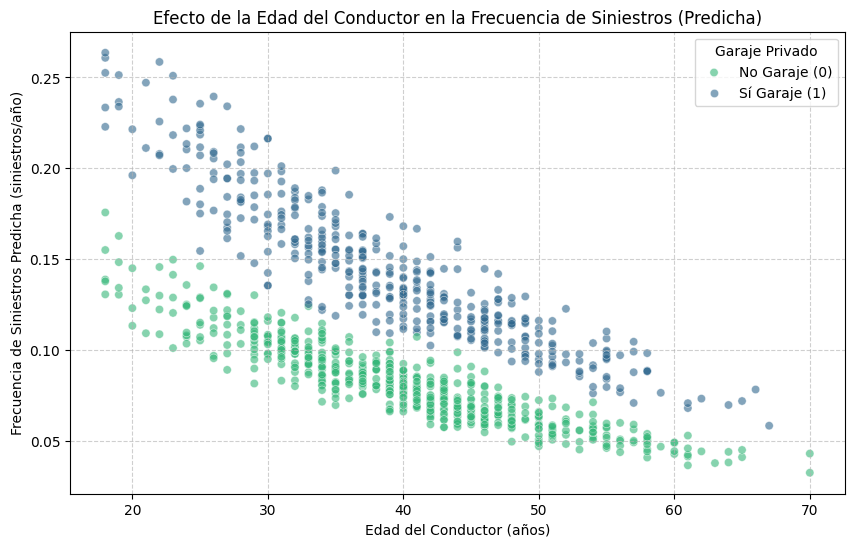

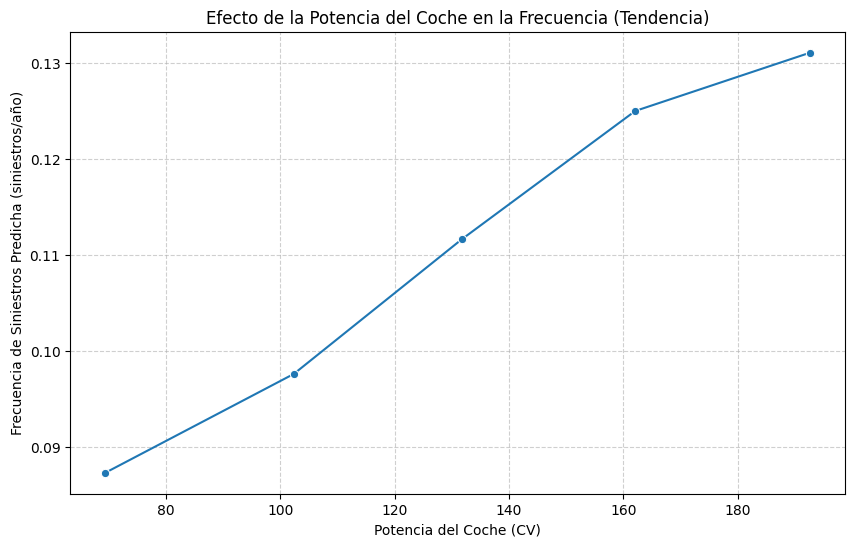

In [5]:
# --- Gráfico 1: Efecto de la Edad en la Frecuencia ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad_Conductor', y='Frecuencia_Predicha', data=df, alpha=0.6, hue='Garaje_Privado', palette='viridis')
plt.title('Efecto de la Edad del Conductor en la Frecuencia de Siniestros (Predicha)')
plt.xlabel('Edad del Conductor (años)')
plt.ylabel('Frecuencia de Siniestros Predicha (siniestros/año)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Garaje Privado', labels=['No Garaje (0)', 'Sí Garaje (1)'])
plt.show()

# --- Gráfico 2: Frecuencia promedio por Potencia ---
plt.figure(figsize=(10, 6))
# Agrupamos los datos por tramos de Potencia para ver la tendencia más clara
df['Tramo_Potencia'] = pd.cut(df['Potencia_CV'], bins=5, labels=False, include_lowest=True)
potencia_media = df.groupby('Tramo_Potencia')['Potencia_CV'].mean()
frecuencia_media = df.groupby('Tramo_Potencia')['Frecuencia_Predicha'].mean()
sns.lineplot(x=potencia_media, y=frecuencia_media, marker='o')
plt.title('Efecto de la Potencia del Coche en la Frecuencia (Tendencia)')
plt.xlabel('Potencia del Coche (CV)')
plt.ylabel('Frecuencia de Siniestros Predicha (siniestros/año)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

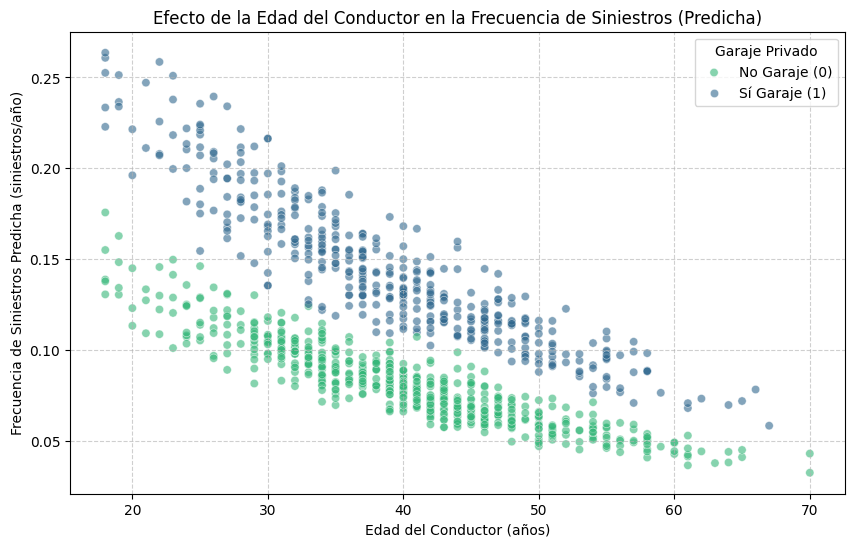

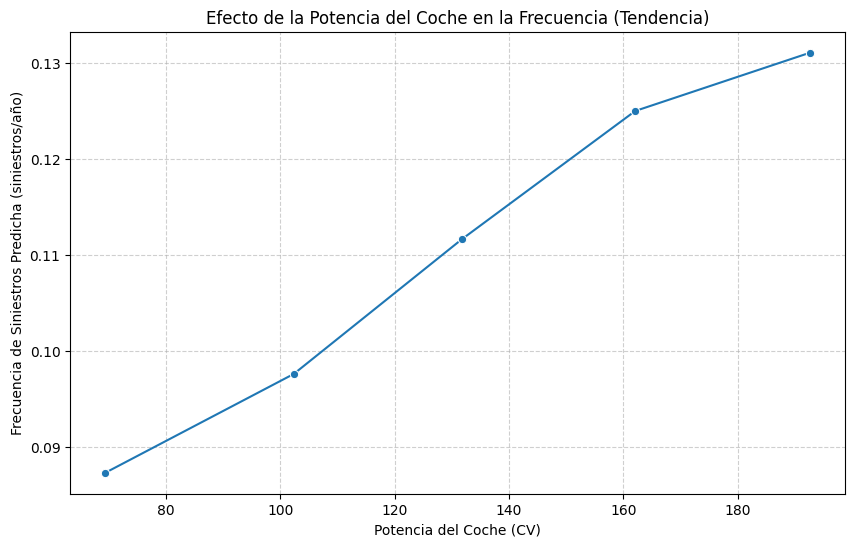

In [6]:
# --- Gráfico 1: Efecto de la Edad en la Frecuencia ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad_Conductor', y='Frecuencia_Predicha', data=df, alpha=0.6, hue='Garaje_Privado', palette='viridis')
plt.title('Efecto de la Edad del Conductor en la Frecuencia de Siniestros (Predicha)')
plt.xlabel('Edad del Conductor (años)')
plt.ylabel('Frecuencia de Siniestros Predicha (siniestros/año)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Garaje Privado', labels=['No Garaje (0)', 'Sí Garaje (1)'])
plt.show()

# --- Gráfico 2: Frecuencia promedio por Potencia ---
plt.figure(figsize=(10, 6))
# Agrupamos los datos por tramos de Potencia para ver la tendencia más clara
df['Tramo_Potencia'] = pd.cut(df['Potencia_CV'], bins=5, labels=False, include_lowest=True)
potencia_media = df.groupby('Tramo_Potencia')['Potencia_CV'].mean()
frecuencia_media = df.groupby('Tramo_Potencia')['Frecuencia_Predicha'].mean()
sns.lineplot(x=potencia_media, y=frecuencia_media, marker='o')
plt.title('Efecto de la Potencia del Coche en la Frecuencia (Tendencia)')
plt.xlabel('Potencia del Coche (CV)')
plt.ylabel('Frecuencia de Siniestros Predicha (siniestros/año)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Gráfico 1: Edad y Garaje
Se observa que la Frecuencia Predicha disminuye a medida que aumenta la edad del conductor (coeficiente negativo).

Las pólizas con Garaje Privado (1) se sitúan consistentemente en niveles de frecuencia más bajos que aquellas sin garaje, ilustrando el fuerte impacto de esa métrica.

Gráfico 2: Potencia
Se aprecia una clara tendencia creciente: a mayor Potencia del Coche, mayor es la Frecuencia de Siniestros esperada (coeficiente positivo).

Estos gráficos y el código demuestran cómo las métricas de riesgo se traducen directamente en una Frecuencia de Siniestros Predicha que es la base para calcular la Prima Pura (Coste esperado del seguro).

¿Te gustaría que ampliemos este ejemplo incluyendo la modelización de la Severidad (coste medio del siniestro) para llegar al coste total de la prima?